In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, validation_curve
from sklearn.model_selection import learning_curve

In [2]:
import os
print(os.listdir("./input"))

['heart.csv', 'winequality-red.csv']


In [3]:
df = pd.read_csv("./input/winequality-red.csv")
# First 5 rows of our data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# set the random seed as 61 to make sure the result is repeatable
np.random.seed(61)

## Data Preprocessing

In [5]:
df.isnull().any().any() # check if there is any null value

False

In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
print(df.shape)

(1599, 12)


In [8]:
#count of each target variable
from collections import Counter
Counter(df['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

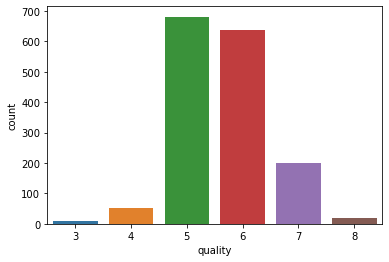

In [9]:
#show the distribution of the wine quality
ax = sns.countplot(x='quality', data=df)
fig = ax.get_figure()
fig.savefig("fig1a.png") 

Here I choose to re-define the wine quality group into two groups:<br>
quality <= 6 --> normal (0)<br>
quality > 6 --> good (1)<br>

Counter({0: 1382, 1: 217})


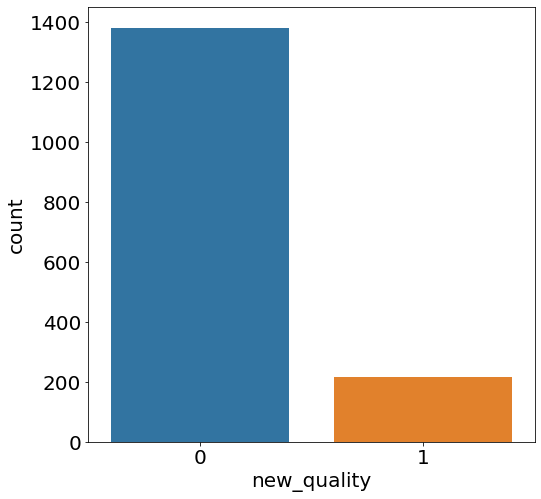

In [42]:
new_quality = []
for i in df['quality']:
    if i <= 6:
        new_quality.append(0)
    else:
        new_quality.append(1)

df['new_quality'] = new_quality
print(Counter(df['new_quality']))
ax2 = sns.countplot(x='new_quality', data=df)
fig2 = ax2.get_figure()
fig2.savefig("fig1b.png") 

In [11]:
y = pd.DataFrame(df.new_quality.values, columns = ['wine_quality'])
x_data = df.drop(['quality', 'new_quality'], axis = 1)
# Normalize the data
# https://scikit-learn.org/stable/modules/preprocessing.html
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(x_data.values)
x_data_normalized = pd.DataFrame(X_train_minmax, columns = x_data.columns)
x_data_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [12]:
y.head()

,wine_quality
0,0
1,0
2,0
3,0
4,0


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_data_normalized,y,test_size = 0.2,random_state=61)
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

## Learning Curves function

In [33]:
# plot setting fix
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
matplotlib.rcParams.update({'font.size': 20})
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5),):
    if axes is None:
        fig, axes = plt.subplots(2, 1, figsize=(15, 15))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")
    return fig, train_scores_mean[-1], test_scores_mean[-1], fit_times_mean[-1]

## Decision Tree

Decision Tree cross validate training score:  1.0
Decision Tree cross validate testing score:  0.8702083333333335
Decision Tree cross validate training time:  0.008774280548095703


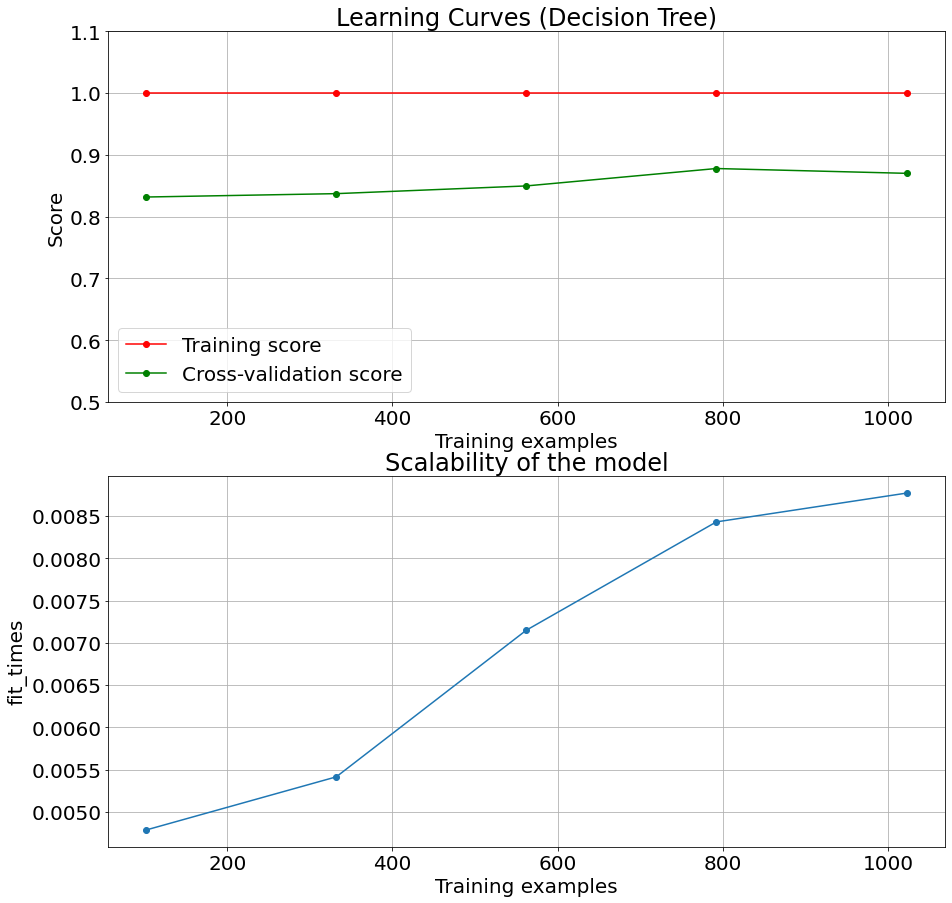

In [34]:
# Decision Tree initial setup without any optimization
from sklearn.tree import DecisionTreeClassifier
# DT learning curve plot and training time vs size
title = "Learning Curves (Decision Tree)"
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)
_, DT_training_score, DT_testing_score, DT_training_time = plot_learning_curve(dtc, title, x_train.T, y_train.T, ylim=(0.5, 1.1), n_jobs=4)
print("Decision Tree cross validate training score: ", DT_training_score)
print("Decision Tree cross validate testing score: ", DT_testing_score)
print("Decision Tree cross validate training time: ", DT_training_time)

In [16]:
dtc_pred_test_y = dtc.predict(x_test.T)
# Calculate the score using single f1 score
dtc_test_f1_scores = f1_score(y_test.T, dtc_pred_test_y,  average="weighted") # y_true, y_predicted
print("testing f1_score", dtc_test_f1_scores)

testing f1_score 0.9042652004122145


Fitting 5 folds for each of 16 candidates, totalling 80 fits
The best DT parameters:  {'ccp_alpha': 0.001, 'max_depth': 20}
Decision Tree training score:  0.987683284457478
Decision Tree testing score:  0.8874234068627451
Decision Tree training time:  0.00901494026184082
testing f1_score 0.9105260722219057


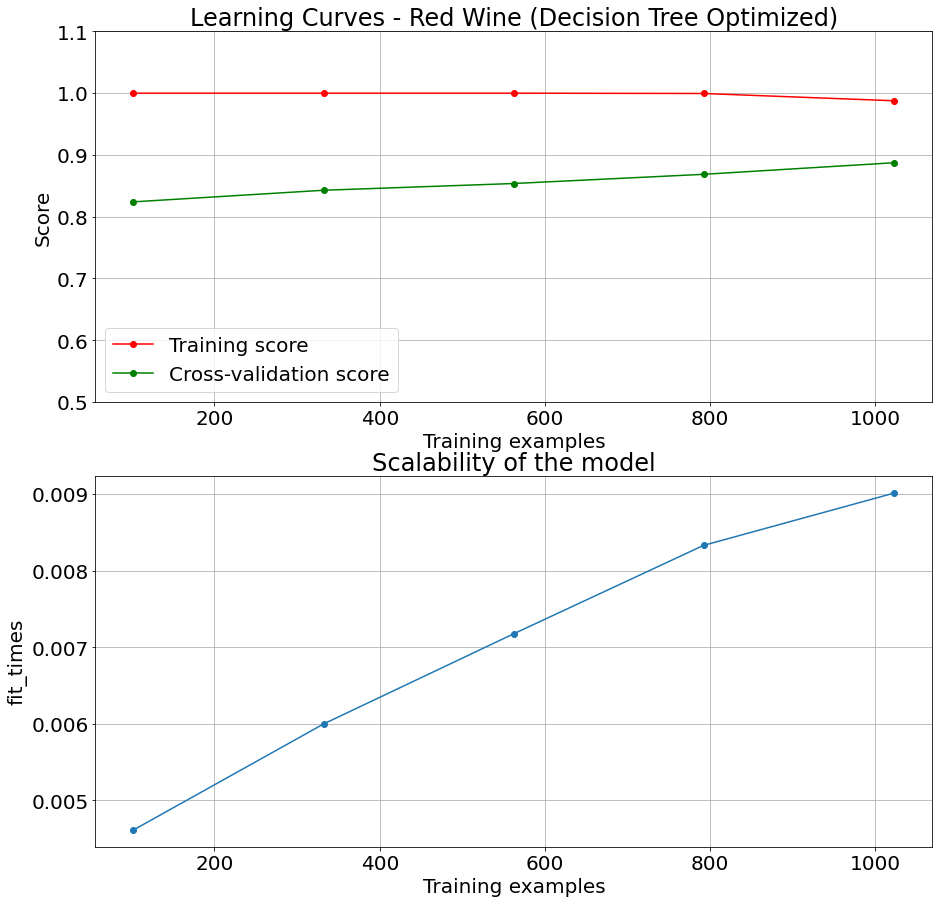

In [35]:
# Decision Tree with pruning optimized by grid search
DT_parameter_grid = {"ccp_alpha": [0.05, 0.01, 0.005, 0.001], "max_depth" : [3, 5, 10, 20]}
dtc2 = DecisionTreeClassifier()
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
dtc_opt_search = GridSearchCV(dtc2, DT_parameter_grid, scoring ='f1_weighted', n_jobs = -1, verbose = 2, return_train_score = True)
dtc_opt_search.fit(x_train.T, y_train.T)
print("The best DT parameters: ", dtc_opt_search.best_params_)
dtc_opt = dtc_opt_search.best_estimator_ # best dtc in the grid search

title = "Learning Curves - Red Wine (Decision Tree Optimized)"

lc_dtc, DT_training_score_opt, DT_testing_score_opt, DT_training_time_opt = plot_learning_curve(dtc_opt, title, x_train.T, y_train.T, ylim=(0.5, 1.1), n_jobs=4)
print("Decision Tree training score: ", DT_training_score_opt)
print("Decision Tree testing score: ", DT_testing_score_opt)
print("Decision Tree training time: ", DT_training_time_opt)
lc_dtc.savefig("wine_dtc_lc.png") 
# f1 score metrics
dtc_pred_test_y = dtc_opt.predict(x_test.T)
# Calculate the score using single f1 score
dtc_test_f1_scores = f1_score(dtc_pred_test_y, y_test.T, average="weighted") # y_true, y_predicted
print("testing f1_score", dtc_test_f1_scores)

## KNN

KNN cross validate training score:  0.9086999022482892
KNN cross validate testing score:  0.8623743872549019
KNN cross validate training time:  0.006232500076293945
knn testing f1_score 0.8590254312153537


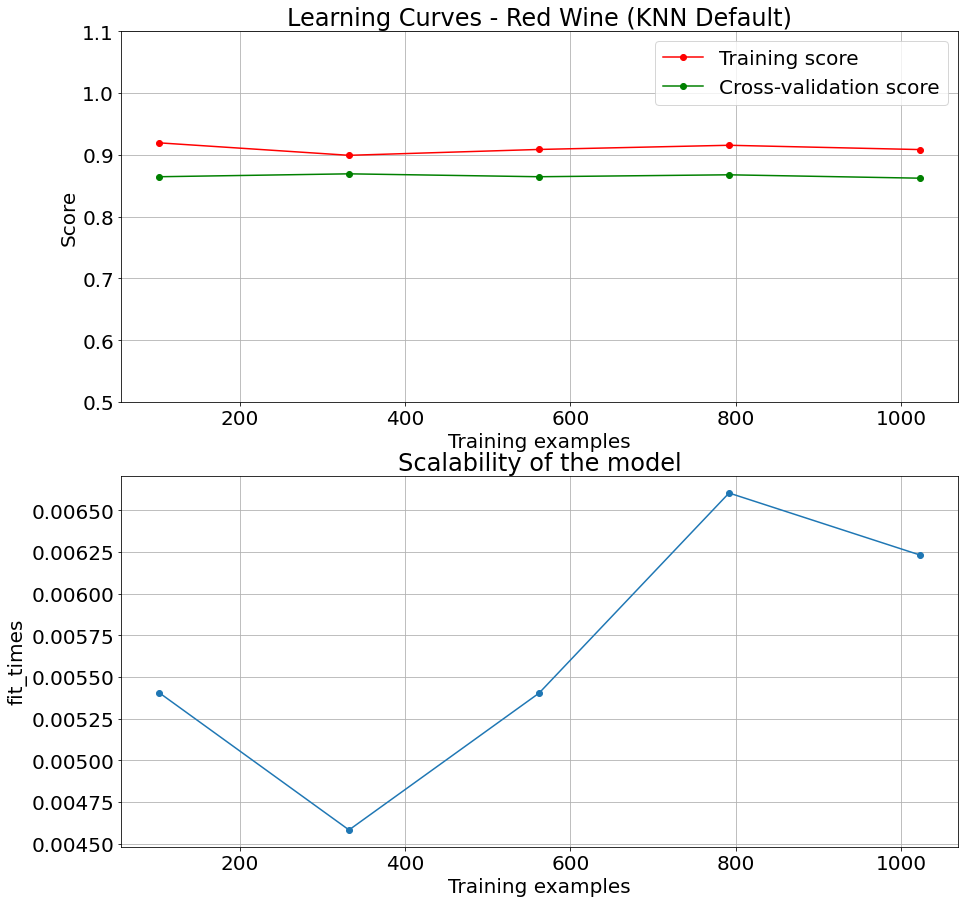

In [40]:
# KNN Model default setup
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)  # n_neighbors means k
#print(y_train.T.shape)
knn.fit(x_train.T, y_train.T.values.ravel())
title = "Learning Curves - Red Wine (KNN Default)"

lc_init_knn_heart, knn_training_score, knn_testing_score, knn_training_time = plot_learning_curve(knn, title, x_train.T, y_train.T, ylim=(0.5, 1.1), n_jobs=4)
print("KNN cross validate training score: ", knn_training_score)
print("KNN cross validate testing score: ", knn_testing_score)
print("KNN cross validate training time: ", knn_training_time)
lc_init_knn_heart.savefig("init_lc_wine_knn.png")

knn_pred_test_y = knn.predict(x_test.T)
# Calculate the score using single f1 score
knn_test_f1_scores = f1_score(y_test.T, knn_pred_test_y, average="weighted") # y_true, y_predicted
print("knn testing f1_score", knn_test_f1_scores)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
The best knn parameters:  {'n_neighbors': 1}
KNN training score:  1.0
KNN testing score:  0.8756678921568627
KNN training time:  0.005961036682128907
testing f1_score 0.8728553921568627


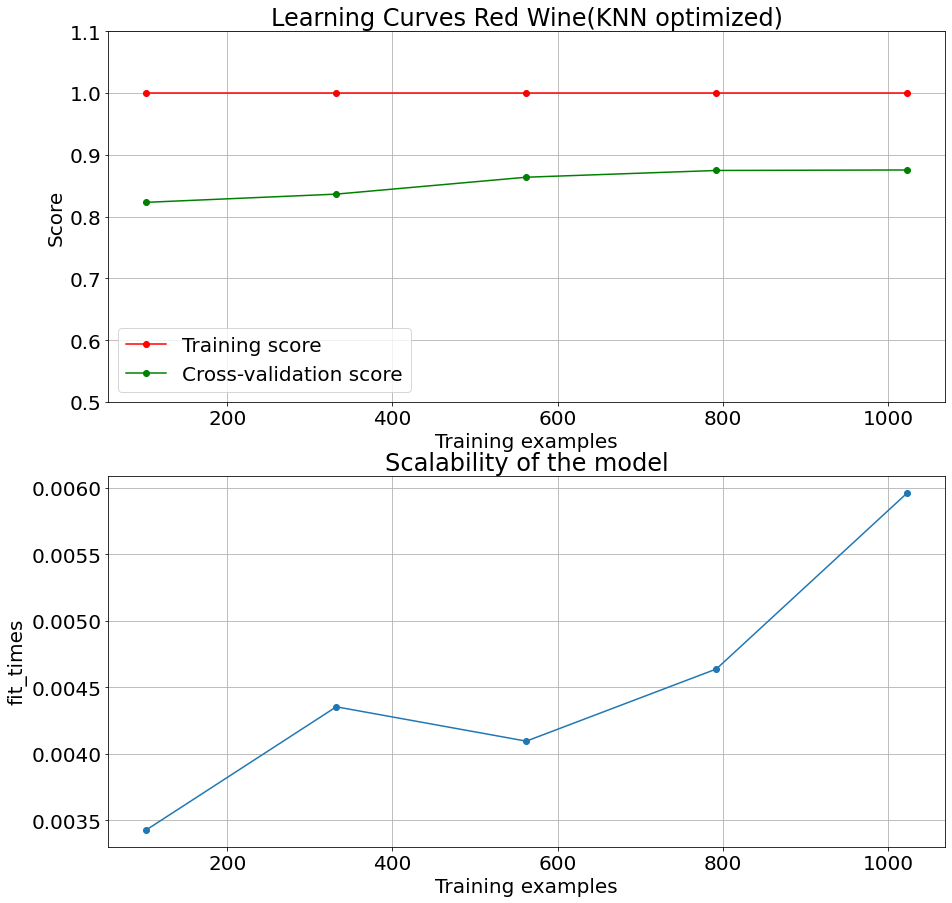

In [44]:
knn_parameter_grid = {"n_neighbors": [i for i in range(1, 21)]}
knn2 = KNeighborsClassifier() 
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
knn_opt_search = GridSearchCV(knn2, knn_parameter_grid, scoring ='f1_weighted', n_jobs = -1, verbose = 2, return_train_score = True)
knn_opt_search.fit(x_train.T, y_train.T.values.ravel())
print("The best knn parameters: ", knn_opt_search.best_params_)

# KNN learning curve
title = "Learning Curves Red Wine(KNN optimized)"
knn_opt = knn_opt_search.best_estimator_ # best knn in the grid search
lc_knn, KNN_training_score_opt, KNN_testing_score_opt, KNN_training_time_opt = plot_learning_curve(knn_opt, title, x_train.T, y_train.T.values.ravel(), ylim=(0.5, 1.1), n_jobs=4)
print("KNN training score: ", KNN_training_score_opt)
print("KNN testing score: ", KNN_testing_score_opt)
print("KNN training time: ", KNN_training_time_opt)
lc_knn.savefig("wine_knn_lc.png") 

# f1 score metrics
knn_pred_test_y = knn_opt.predict(x_test.T)
# Calculate the score using single f1 score
knn_test_f1_scores = f1_score(y_test.T, knn_pred_test_y, average="weighted") # y_true, y_predicted
print("testing f1_score", knn_test_f1_scores)

## Support Vector Machine

SVM cross validate training score:  0.8971652003910068
SVM cross validate testing score:  0.8795833333333334
SVM cross validate training time:  0.024927902221679687
svm testing f1_score 0.8318777531433239


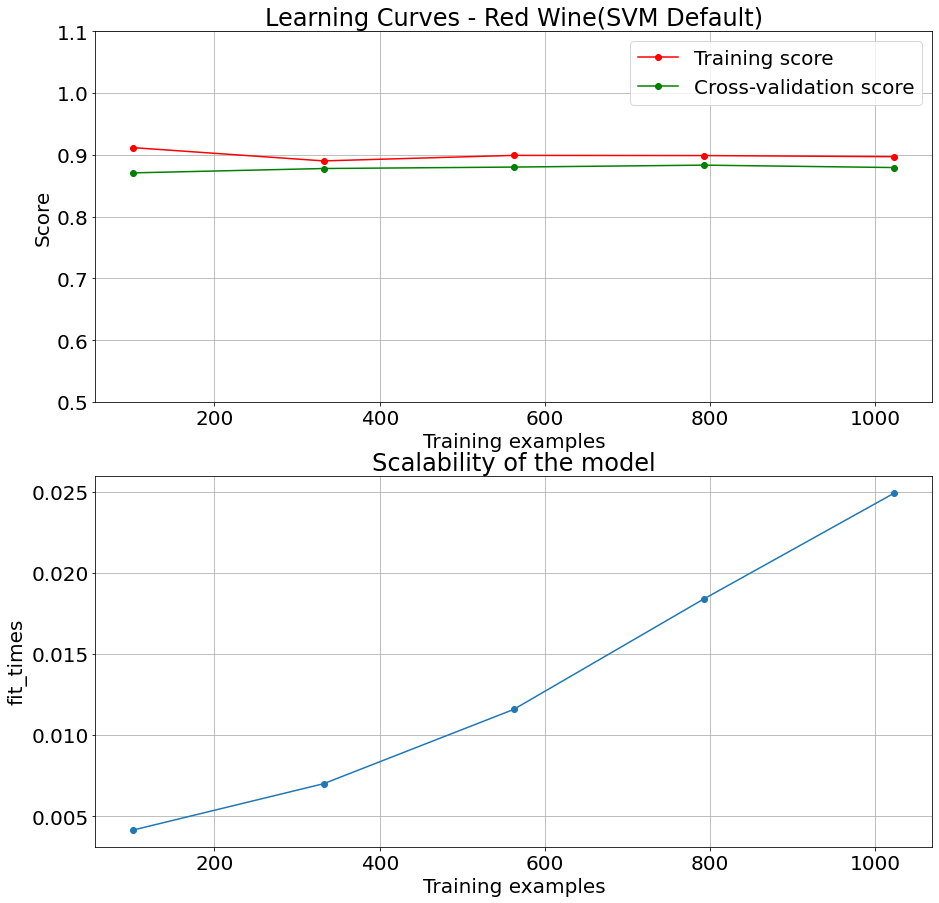

In [46]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train.T, y_train.T.values.ravel())
title = "Learning Curves - Red Wine(SVM Default)"
lc_init_svm_wine, svm_training_score, svm_testing_score, svm_training_time = plot_learning_curve(svm, title, x_train.T, y_train.T, ylim=(0.5, 1.1), n_jobs=4)
print("SVM cross validate training score: ", svm_training_score)
print("SVM cross validate testing score: ", svm_testing_score)
print("SVM cross validate training time: ", svm_training_time)
lc_init_svm_wine.savefig("init_lc_wine_svm.png")

svm_pred_test_y = svm.predict(x_test.T)
# Calculate the score using single f1 score
svm_test_f1_scores = f1_score(y_test.T, svm_pred_test_y, average="weighted") # y_true, y_predicted
print("svm testing f1_score", svm_test_f1_scores)

In [49]:
# find the optimal kernel and regulation parameter C
SVM_param_grid = {
    'kernel': ["linear", "poly", "rbf", "sigmoid"],
    'C' : [0.1, 0.5, 1.0, 2.0]
}

svm2 = SVC()
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
svm_opt_search = GridSearchCV(svm2, SVM_param_grid, scoring ='f1_weighted', n_jobs = -1, verbose = 2, return_train_score = True)
svm_opt_search.fit(x_train.T, y_train.T.values.ravel())
print("The best SVM parameters: ", svm_opt_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
The best SVM parameters:  {'C': 2.0, 'kernel': 'poly'}


SVM training score:  0.9104594330400781
SVM testing score:  0.8827236519607844
SVM training time:  0.06358451843261718
testing f1_score 0.8264474496092143


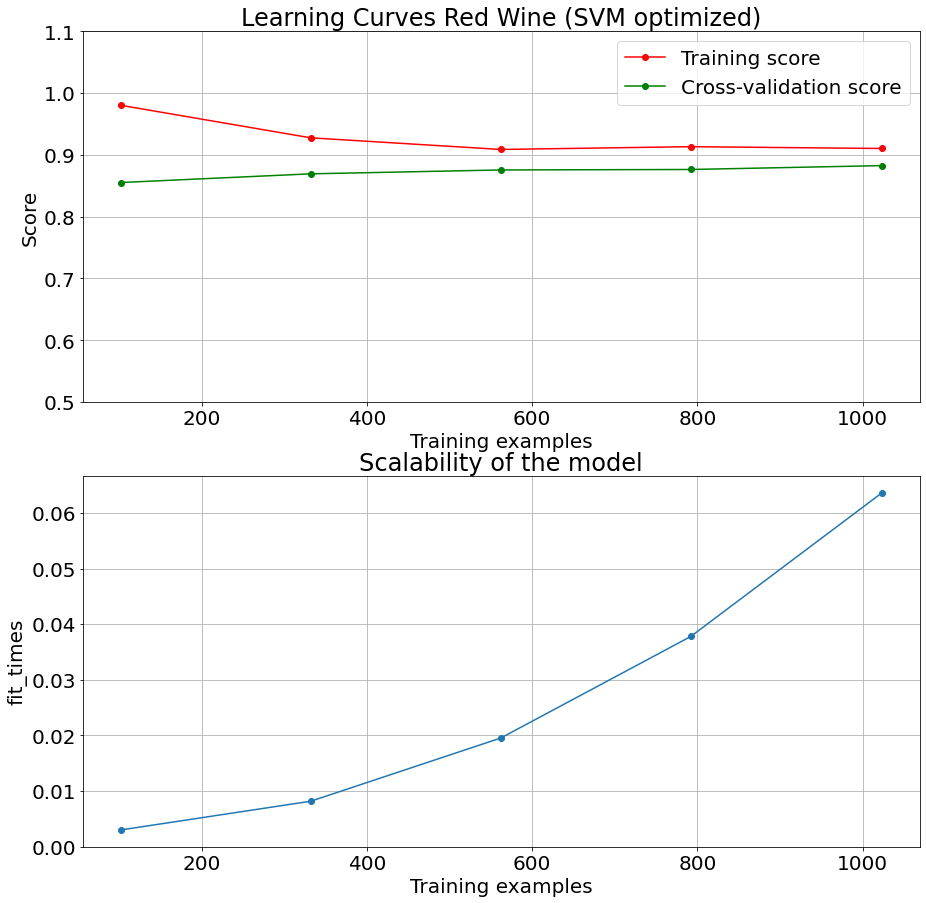

In [50]:
# learning curve on optimized support vector machine
title = "Learning Curves Red Wine (SVM optimized)"
svm_opt = svm_opt_search.best_estimator_ # best SVM in the grid search
lc_svm, SVM_training_score_opt, SVM_testing_score_opt, SVM_training_time_opt = plot_learning_curve(svm_opt, title, x_train.T, y_train.T.values.ravel(), ylim=(0.5, 1.1), n_jobs=4)
print("SVM training score: ", SVM_training_score_opt)
print("SVM testing score: ", SVM_testing_score_opt)
print("SVM training time: ", SVM_training_time_opt)
lc_svm.savefig("wine_svm_lc.png") 

# f1 score metrics
svm_pred_test_y = svm_opt.predict(x_test.T)
# Calculate the score using single f1 score
svm_test_f1_scores = f1_score(y_test.T, svm_pred_test_y, average="weighted") # y_true, y_predicted
print("testing f1_score", svm_test_f1_scores)

## Adaboost

In [26]:
# Ada boost based on decision tree
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier
dt_base = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator = dt_base, n_estimators = 50, learning_rate = 0.05)
ada.fit(x_train.T, y_train.T.values.ravel())

ada_pred_test_y = ada.predict(x_test.T)
# Calculate the score using single f1 score
ada_test_f1_scores = f1_score(y_test.T, ada_pred_test_y, average="weighted") # y_true, y_predicted
print("ada testing f1_score", ada_test_f1_scores)

ada testing f1_score 0.9007945185509147


In [27]:
# find the optimal adaboost
adaboost_param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'learning_rate' : [10, 1, 0.1, 0.01, 0.001],
    'base_estimator__max_depth': [3, 5, 10, 20],
    "base_estimator__ccp_alpha": [0.05, 0.01, 0.005, 0.001]
}
dt_base2 = DecisionTreeClassifier()
ada2 = AdaBoostClassifier(base_estimator = dt_base2)
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
ada_opt_search = GridSearchCV(ada2, adaboost_param_grid, scoring ='f1_weighted', n_jobs = -1, verbose = 2, return_train_score = True)
ada_opt_search.fit(x_train.T, y_train.T.values.ravel())
print("The best adaboost parameters: ", ada_opt_search.best_params_)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
The best adaboost parameters:  {'base_estimator__ccp_alpha': 0.005, 'base_estimator__max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 75}


adaboost training score:  1.0
adaboost testing score:  0.9046047794117648
adaboost training time:  0.31692042350769045
ada testing f1_score 0.9361883942766294


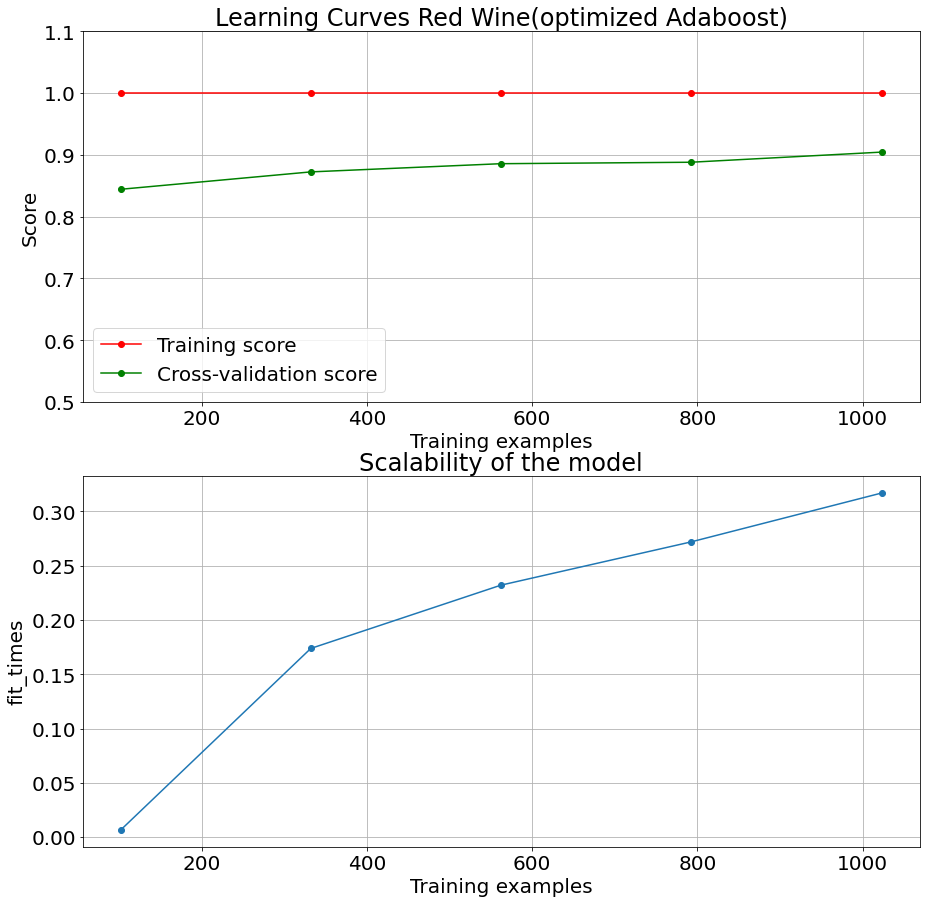

In [37]:
title = "Learning Curves Red Wine(optimized Adaboost)"
ada_opt = ada_opt_search.best_estimator_ # best adaboost in the grid search
lc_ada, ada_training_score_opt, ada_testing_score_opt, ada_training_time_opt = plot_learning_curve(ada_opt, title, x_train.T, y_train.T.values.ravel(), ylim=(0.5, 1.1), n_jobs=4)
print("adaboost training score: ", ada_training_score_opt)
print("adaboost testing score: ", ada_testing_score_opt)
print("adaboost training time: ", ada_training_time_opt)
lc_ada.savefig("wine_ada_lc.png") 
ada_pred_test_y = ada_opt.predict(x_test.T)
# Calculate the score using single f1 score
ada_test_f1_scores = f1_score(y_test.T, ada_pred_test_y, average="weighted") # y_true, y_predicted
print("ada testing f1_score", ada_test_f1_scores)

## Neural Network

Neural Network training score:  0.8909090909090909
Neural Network testing score:  0.8827205882352942
Neural Network training time:  1.006573534011841
nn testing f1_score 0.8415027218030753


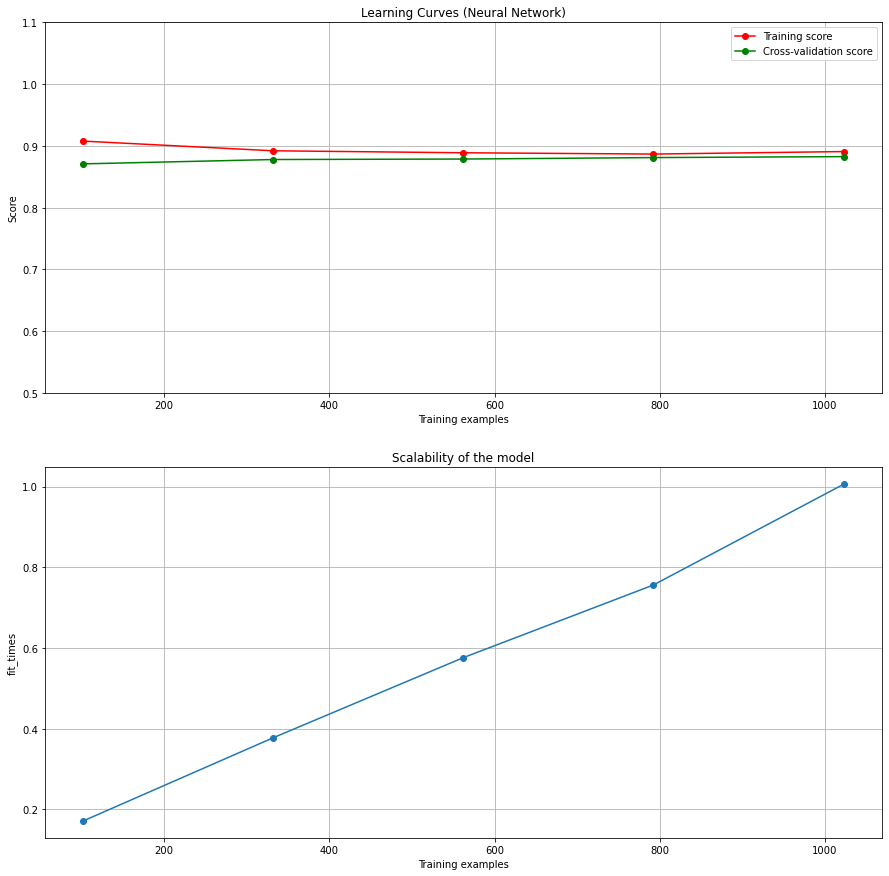

In [29]:
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
#https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification
nn = MLPClassifier()
title = "Learning Curves (Neural Network)"
nn.fit(x_train.T, y_train.T.values.ravel())

_, nn_training_score, nn_testing_score, nn_training_time = plot_learning_curve(nn, title, x_train.T, y_train.T.values.ravel(), ylim=(0.5, 1.1), n_jobs=4)
print("Neural Network training score: ", nn_training_score)
print("Neural Network testing score: ", nn_testing_score)
print("Neural Network training time: ", nn_training_time)

nn_pred_test_y = nn.predict(x_test.T)
# Calculate the score using single f1 score
nn_test_f1_scores = f1_score(y_test.T, nn_pred_test_y, average="weighted") # y_true, y_predicted
print("nn testing f1_score", nn_test_f1_scores)

In [38]:
nn_param_grid = {
    'hidden_layer_sizes': [(100), (10,50), (10,50,80), (10, 50, 80, 120)],
    'learning_rate_init': [1, 0.1, 0.01, 0.001]
}
nn2 = MLPClassifier()
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
nn_opt_search = GridSearchCV(nn2, nn_param_grid, scoring ='f1_weighted', n_jobs = -1, verbose = 2, return_train_score = True)
nn_opt_search.fit(x_train.T, y_train.T.values.ravel())
print("The best nn parameters: ", nn_opt_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
The best nn parameters:  {'hidden_layer_sizes': (10, 50, 80), 'learning_rate_init': 0.001}


Neural Network training score:  0.89227761485826
Neural Network testing score:  0.8803829656862746
Neural Network training time:  1.3909364223480225
nn testing f1_score 0.8537754303599373


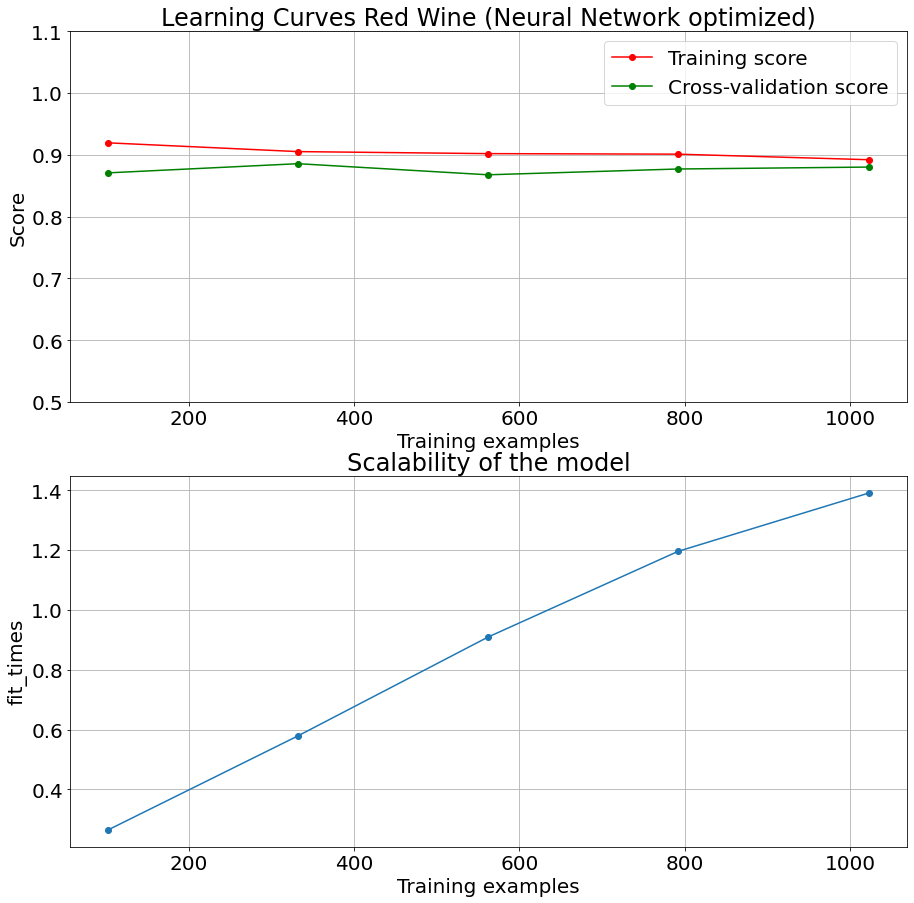

In [39]:
nn_opt = nn_opt_search.best_estimator_ # best adaboost in the grid search
title = "Learning Curves Red Wine (Neural Network optimized)"
lc_nn, nn_training_score_opt, nn_testing_score_opt, nn_training_time_opt = plot_learning_curve(nn_opt, title, x_train.T, y_train.T.values.ravel(), ylim=(0.5, 1.1), n_jobs=4)
print("Neural Network training score: ", nn_training_score_opt)
print("Neural Network testing score: ", nn_testing_score_opt)
print("Neural Network training time: ", nn_training_time_opt)
lc_nn.savefig("wine_nn_lc.png") 
nn_pred_test_y = nn_opt.predict(x_test.T)
# Calculate the score using single f1 score
nn_test_f1_scores = f1_score(y_test.T, nn_pred_test_y, average="weighted") # y_true, y_predicted
print("nn testing f1_score", nn_test_f1_scores)